<a href="https://colab.research.google.com/github/Saguirre9911/Tensorflow_sequential_model/blob/main/Tf2_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
<a id="coding_tutorial_1"></a>
# Tensorflow para principiantes en Español, KERAS Sequential model
## PAL INGENIERO 2020



In [ ]:
#Importar tensorflow 
import tensorflow as tf
print(tf.__version__)

2.3.0


#PASO 1, Construir el modelo

In [ ]:
#Se importan el modelo secuencial y las primeras capas a utilizar
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Ejemplo de la construcción de una feedfoward neural network con el modelo secuencial



In [ ]:
#Se crea la red neuronal y se imprime el resumen para ver las capas creadas

MLP = Sequential([
    Flatten(input_shape=(28,28),name='input_layer'), #En la primera capa se debe agrear el tamaño de la entrada
    Dense(32, activation='relu',name='Segunda_capa'), #Capa Densa, con 16 unidades, función de activación Relu, se llama layer 1
    Dense(32, activation='relu'),
    Dense(10),
    Softmax()
])
MLP.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Segunda_capa (Dense)         (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


#### Creación  de una CNN con tensorflow 2.0

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D # se importan las capas a utilizar para la CNN y se muestra su resumen
CNN = Sequential([
    Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1),padding='same'), # Capa de convolución(Numero de filtros, tamaño del filtro, función de activación, tamaño de entrada)
    MaxPooling2D((3,3)), #Poopling layer (tamaño del kernel)
    Flatten(), #Vuelve los datos en un vector #1D
    Dense(10,activation='softmax') #En la ultima capa van en numero de clases
])
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


#PASO 2
## Método Compile 
###Primera sintaxis

In [ ]:
#Se deben definir Optimizador, función de perdida y metricas de evaluación

opt=tf.keras.optimizers.Adam(learning_rate=0.005) #Con esta sintaxis se pueden enviar parametros de la documentación
acc=tf.keras.metrics.SparseCategoricalAccuracy() #Sintaxis tomada de la documentación de tf 
mae=tf.keras.metrics.MeanAbsoluteError()
lost=tf.keras.losses.CategoricalCrossentropy()
#Siempre se define en compile: el optimizador, la función de perdidas, y las metricas
MLP.compile(optimizer=opt, 
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])

print(MLP.loss)
print(MLP.optimizer)

sparse_categorical_crossentropy


###Segunda sintaxis

In [ ]:
CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])
print(CNN.loss)
print(CNN.optimizer)

sparse_categorical_crossentropy


#PASO 3.
##Método Fit

4423680/4422102 [==============================] - 0s 0us/step


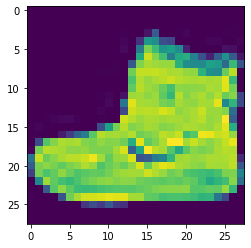

label: Ankle boot


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Se hará uso del dataset minist
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

train_images = train_images/255.
test_images = test_images/255.


i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")



In [ ]:
history=CNN.fit(train_images[...,np.newaxis],train_labels, epochs=4,batch_size=256,verbose=2) #Para el metodo fit(imagenes o datos de entrenamiento, las etiquetas respectivas, el numero de epocas, batch_size,
#Verbose para ver o no el proceso del entrenamiento)

Epoch 1/4
235/235 - 14s - loss: 0.8058 - accuracy: 0.7345 - mae: 4.4200
Epoch 2/4
235/235 - 15s - loss: 0.4709 - accuracy: 0.8384 - mae: 4.4200
Epoch 3/4
235/235 - 15s - loss: 0.4125 - accuracy: 0.8577 - mae: 4.4200
Epoch 4/4
235/235 - 14s - loss: 0.3832 - accuracy: 0.8670 - mae: 4.4200


In [ ]:
#Mostrando los resultados de entrenamiento, en la variable history se almacenó un dataframe, por eso se usó pandas
df= pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.805830,0.734467,4.420001
1,0.470930,0.838433,4.420000
2,0.412468,0.857700,4.420001
3,0.383219,0.867033,4.419999


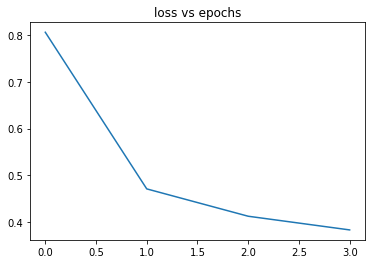

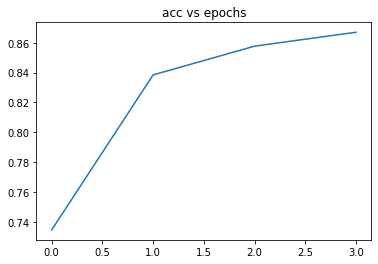

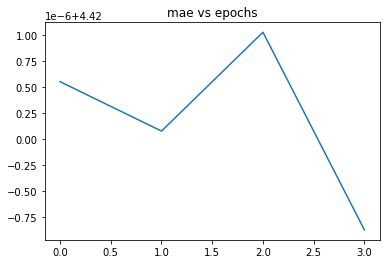

In [ ]:
acc_plot=df.plot(y='loss',title='loss vs epochs',legend=False)
acc_plot=df.plot(y='accuracy',title='acc vs epochs',legend=False)
acc_plot=df.plot(y='mae',title='mae vs epochs',legend=False)

#Paso 4, evaluar el modelo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
test_loss, test_acc, test_mae= CNN.evaluate(test_images[...,np.newaxis],test_labels, verbose=2)

In [ ]:
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")
test_image.shape

## El modelo genera 9 predicciones y escoge el máximo entre las mismas. 

In [ ]:
predictions=CNN.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction:{labels[np.argmax(predictions)]}")
predictions 
